In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


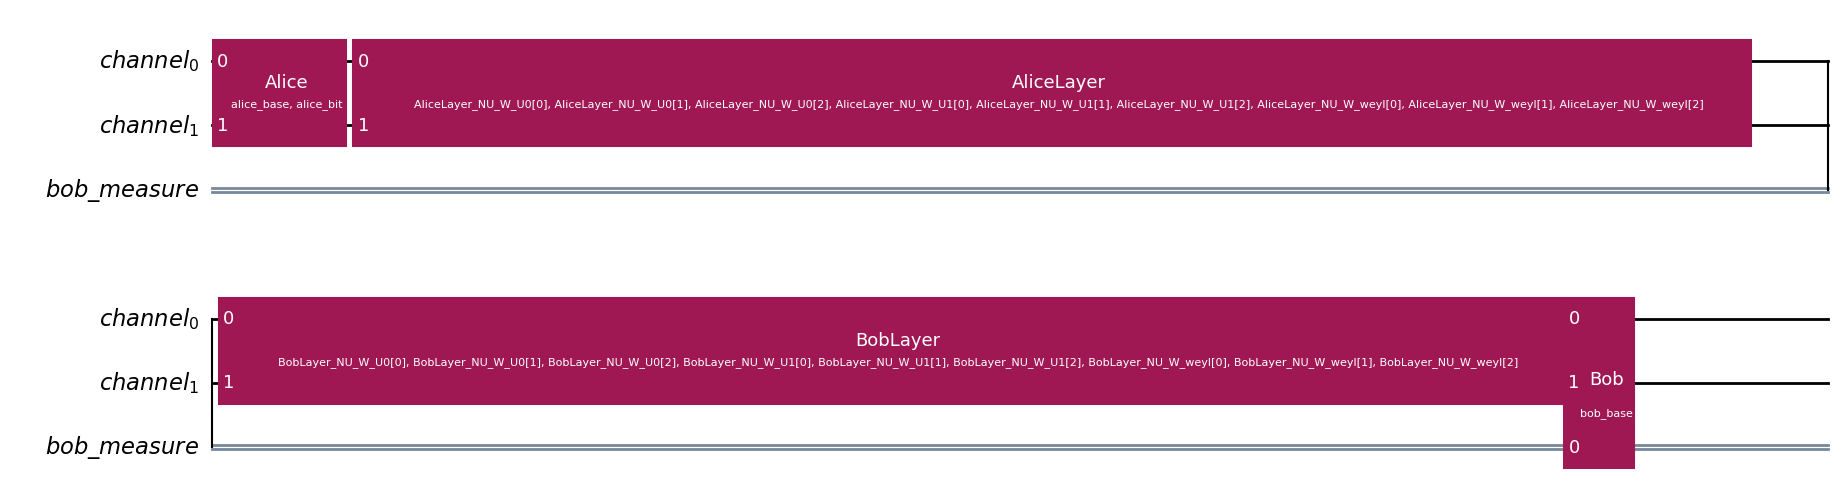

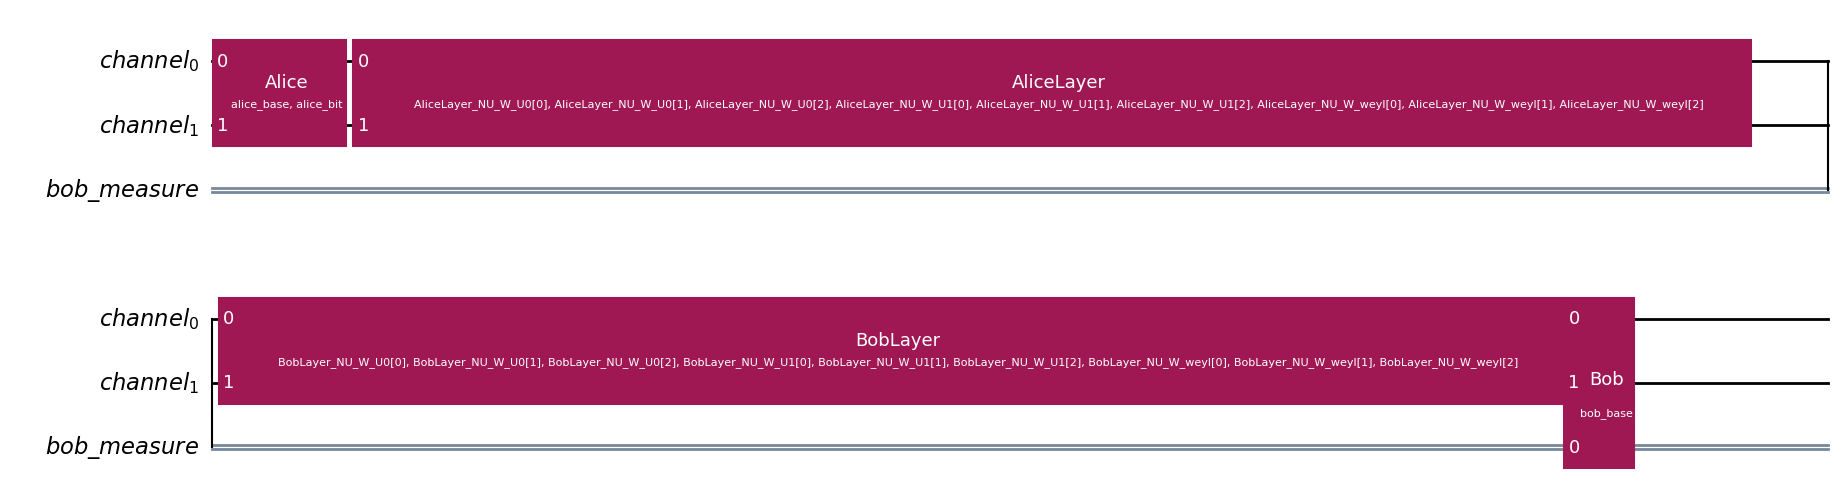

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.42460317460317465)}
epoch: 0, loss: -0.56877201795578, QBER: {'bob_qber': np.float64(0.3055555555555556)}
epoch: 5, loss: -0.9371035099029541, QBER: {'bob_qber': np.float64(0.04761904761904767)}
epoch: 10, loss: -0.9871471524238586, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 15, loss: -0.9955878257751465, QBER: {'bob_qber': np.float64(0.003968253968253954)}
epoch: 19, loss: -0.9920057058334351, QBER: {'bob_qber': np.float64(0.003968253968253954)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

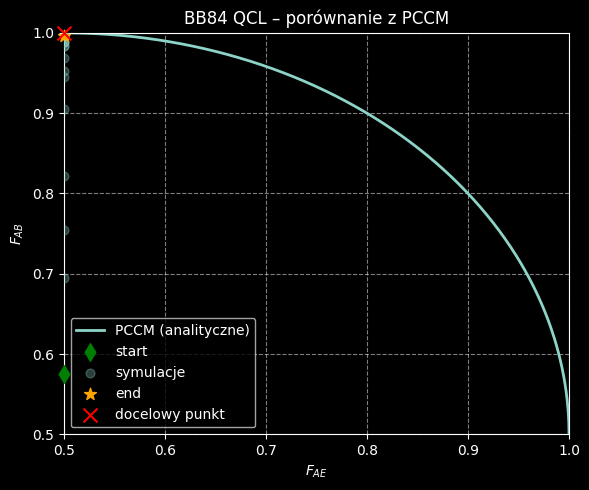

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss5
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5)}
epoch: 0, loss: -0.9889458417892456, QBER: {'bob_qber': np.float64(0.11397058823529416), 'eve_qber': np.float64(0.5036764705882353)}
epoch: 5, loss: -0.9381278157234192, QBER: {'bob_qber': np.float64(0.018382352941176516), 'eve_qber': np.float64(0.5073529411764706)}
epoch: 10, loss: -0.9861465692520142, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5183823529411764)}
epoch: 15, loss: -0.9998100996017456, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.4595588235294118)}
epoch: 20, loss: -1.0131113529205322, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.375)}
epoch: 25, loss: -1.056018590927124, QBER: {'bob_qber': np.float64(0.08088235294117652), 'eve_qber': np.float64(0.2720588235294118)}
epoch: 30, loss: -1.0909502506256104, QBER: {'bob_qber': np.float64(0.11029411764705888), 'eve_qber': np.float64(0.227941

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

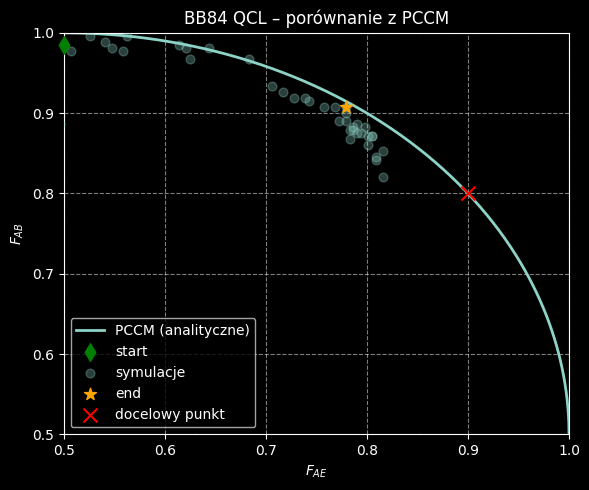

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.49823925), 'AliceLayer_NU_W_U0[1]': np.float32(-0.2208758), 'AliceLayer_NU_W_U0[2]': np.float32(-0.9658422), 'AliceLayer_NU_W_U1[0]': np.float32(-1.1417142), 'AliceLayer_NU_W_U1[1]': np.float32(1.7862264), 'AliceLayer_NU_W_U1[2]': np.float32(-0.6596904), 'AliceLayer_NU_W_weyl[0]': np.float32(0.43275103), 'AliceLayer_NU_W_weyl[1]': np.float32(0.009992744), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.3126958), 'BobLayer_NU_W_U0[0]': np.float32(-0.8796262), 'BobLayer_NU_W_U0[1]': np.float32(1.152086), 'BobLayer_NU_W_U0[2]': np.float32(0.3126942), 'BobLayer_NU_W_U1[0]': np.float32(-2.1901908), 'BobLayer_NU_W_U1[1]': np.float32(0.01066835), 'BobLayer_NU_W_U1[2]': np.float32(0.85172206), 'BobLayer_NU_W_weyl[0]': np.float32(0.25690645), 'BobLayer_NU_W_weyl[1]': np.float32(-0.36458942), 'BobLayer_NU_W_weyl[2]': np.float32(-0.4055951)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.07816552), 'NU_W_0_0_U0[1]': np.float32(0.09519871),

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.09191176470588236), 'eve_qber': np.float64(0.22058823529411764)}
epoch: 0, loss: -0.8894845247268677, QBER: {'bob_qber': np.float64(0.13235294117647056), 'eve_qber': np.float64(0.2536764705882353)}
epoch: 5, loss: -0.9271620512008667, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.34191176470588236)}
epoch: 10, loss: -0.9459030628204346, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.48897058823529416)}
epoch: 15, loss: -0.9773105382919312, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5330882352941176)}
epoch: 20, loss: -0.9787317514419556, QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.5404411764705883)}
epoch: 25, loss: -0.9903080463409424, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5110294117647058)}
epoch: 30, loss: -0.9960014224052429, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.f

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

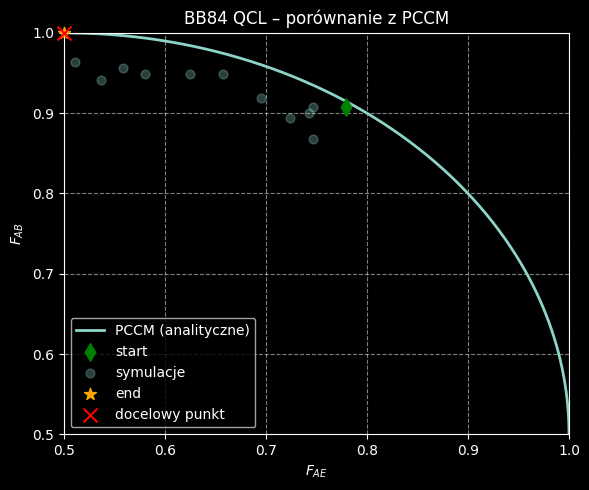

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.07816552), 'NU_W_0_0_U0[1]': np.float32(0.09519871), 'NU_W_0_0_U0[2]': np.float32(0.04644383), 'NU_W_0_0_U1[0]': np.float32(0.59133685), 'NU_W_0_0_U1[1]': np.float32(0.1013087), 'NU_W_0_0_U1[2]': np.float32(-0.16152947), 'NU_W_0_0_weyl[0]': np.float32(-0.28306222), 'NU_W_0_0_weyl[1]': np.float32(-0.8294344), 'NU_W_0_0_weyl[2]': np.float32(-0.52062696), 'NU_W_0_1_U0[0]': np.float32(-0.14435866), 'NU_W_0_1_U0[1]': np.float32(0.39151016), 'NU_W_0_1_U0[2]': np.float32(3.4598215e-09), 'NU_W_0_1_U1[0]': np.float32(0.113601774), 'NU_W_0_1_U1[1]': np.float32(0.096809395), 'NU_W_0_1_U1[2]': np.float32(-2.6954275e-08), 'NU_W_0_1_weyl[0]': np.float32(-0.062131673), 'NU_W_0_1_weyl[1]': np.float32(-0.09848612), 'NU_W_0_1_weyl[2]': np.float32(0.3200954), 'NU_W_1_0_U0[0]': np.float32(-0.20003742), 'NU_W_1_0_U0[1]': np.float32(0.2346979), 'NU_W_1_0_U0[2]': np.float32(0.23319231), 'NU_W_1_0_U1[0]': np.float32(-0.49507666), 'NU_W_1_0_U1[1]': np.float

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss5
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.5551470588235294)}
epoch: 0, loss: -0.9607582688331604, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.4779411764705882)}
epoch: 5, loss: -1.0120447874069214, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.3933823529411765)}
epoch: 10, loss: -1.0188730955123901, QBER: {'bob_qber': np.float64(0.08088235294117652), 'eve_qber': np.float64(0.2867647058823529)}
epoch: 15, loss: -1.0823854207992554, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.20220588235294112)}
epoch: 20, loss: -1.0788711309432983, QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.float64(0.15808823529411764)}
epoch: 25, loss: -1.1519627571105957, QBER: {'bob_qber': np.float64(0.25735294117647056), 'eve_qber': np.float64(0.1029411764705882)}
epoch: 30, loss: -1.131701111793518, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

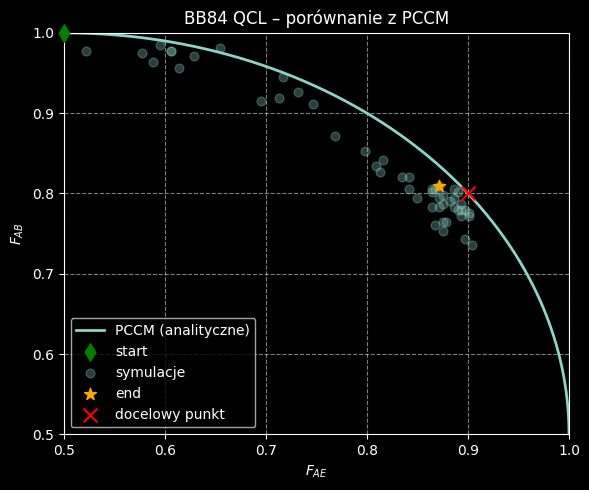

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.93481153), 'AliceLayer_NU_W_U0[1]': np.float32(-0.05103349), 'AliceLayer_NU_W_U0[2]': np.float32(-1.4147546), 'AliceLayer_NU_W_U1[0]': np.float32(-2.451712), 'AliceLayer_NU_W_U1[1]': np.float32(0.4394865), 'AliceLayer_NU_W_U1[2]': np.float32(-0.6596904), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.120143406), 'AliceLayer_NU_W_weyl[1]': np.float32(0.43182233), 'AliceLayer_NU_W_weyl[2]': np.float32(0.91995937), 'BobLayer_NU_W_U0[0]': np.float32(-1.1706201), 'BobLayer_NU_W_U0[1]': np.float32(1.5247973), 'BobLayer_NU_W_U0[2]': np.float32(0.49605438), 'BobLayer_NU_W_U1[0]': np.float32(-1.8552394), 'BobLayer_NU_W_U1[1]': np.float32(-0.6099078), 'BobLayer_NU_W_U1[2]': np.float32(0.93550164), 'BobLayer_NU_W_weyl[0]': np.float32(0.40889984), 'BobLayer_NU_W_weyl[1]': np.float32(-0.1619138), 'BobLayer_NU_W_weyl[2]': np.float32(-0.5570042)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.82718945), 'NU_W_0_0_U0[1]': np.float32(-0.1125289

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float64(0.12867647058823528)}
epoch: 0, loss: -0.8400125503540039, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.1654411764705882)}
epoch: 5, loss: -0.9557358026504517, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.3713235294117647)}
epoch: 10, loss: -0.9675514698028564, QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.44485294117647056)}
epoch: 15, loss: -0.9775638580322266, QBER: {'bob_qber': np.float64(0.02573529411764708), 'eve_qber': np.float64(0.44485294117647056)}
epoch: 20, loss: -0.9799587726593018, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.4632352941176471)}
epoch: 25, loss: -0.9900243878364563, QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 30, loss: -0.9876623153686523, QBER: {'bob_qber': np.float64(0.007352941176470562), 

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

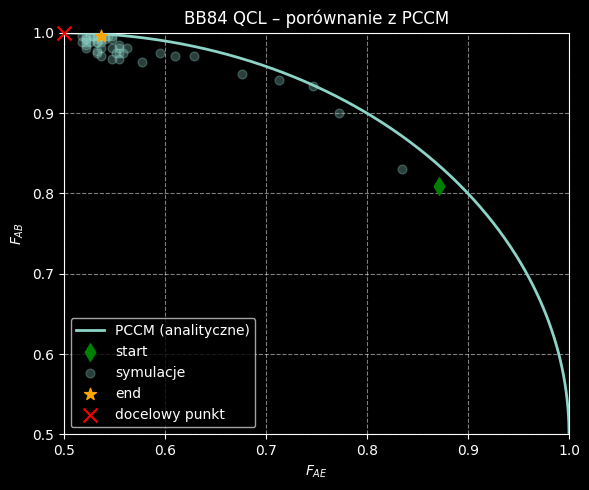

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.82718945), 'NU_W_0_0_U0[1]': np.float32(-0.1125289), 'NU_W_0_0_U0[2]': np.float32(-0.14240922), 'NU_W_0_0_U1[0]': np.float32(0.18896315), 'NU_W_0_0_U1[1]': np.float32(0.44679174), 'NU_W_0_0_U1[2]': np.float32(-0.8809455), 'NU_W_0_0_weyl[0]': np.float32(-0.5175729), 'NU_W_0_0_weyl[1]': np.float32(-1.1048646), 'NU_W_0_0_weyl[2]': np.float32(-0.45519382), 'NU_W_0_1_U0[0]': np.float32(0.16841246), 'NU_W_0_1_U0[1]': np.float32(-0.22255647), 'NU_W_0_1_U0[2]': np.float32(8.442338e-09), 'NU_W_0_1_U1[0]': np.float32(-0.19989009), 'NU_W_0_1_U1[1]': np.float32(-1.1415206), 'NU_W_0_1_U1[2]': np.float32(-2.6954275e-08), 'NU_W_0_1_weyl[0]': np.float32(0.35977975), 'NU_W_0_1_weyl[1]': np.float32(0.32706878), 'NU_W_0_1_weyl[2]': np.float32(-0.36543986), 'NU_W_1_0_U0[0]': np.float32(-1.4175516), 'NU_W_1_0_U0[1]': np.float32(-0.14833072), 'NU_W_1_0_U0[2]': np.float32(-0.036103982), 'NU_W_1_0_U1[0]': np.float32(-0.1569552), 'NU_W_1_0_U1[1]': np.float32(-0.0

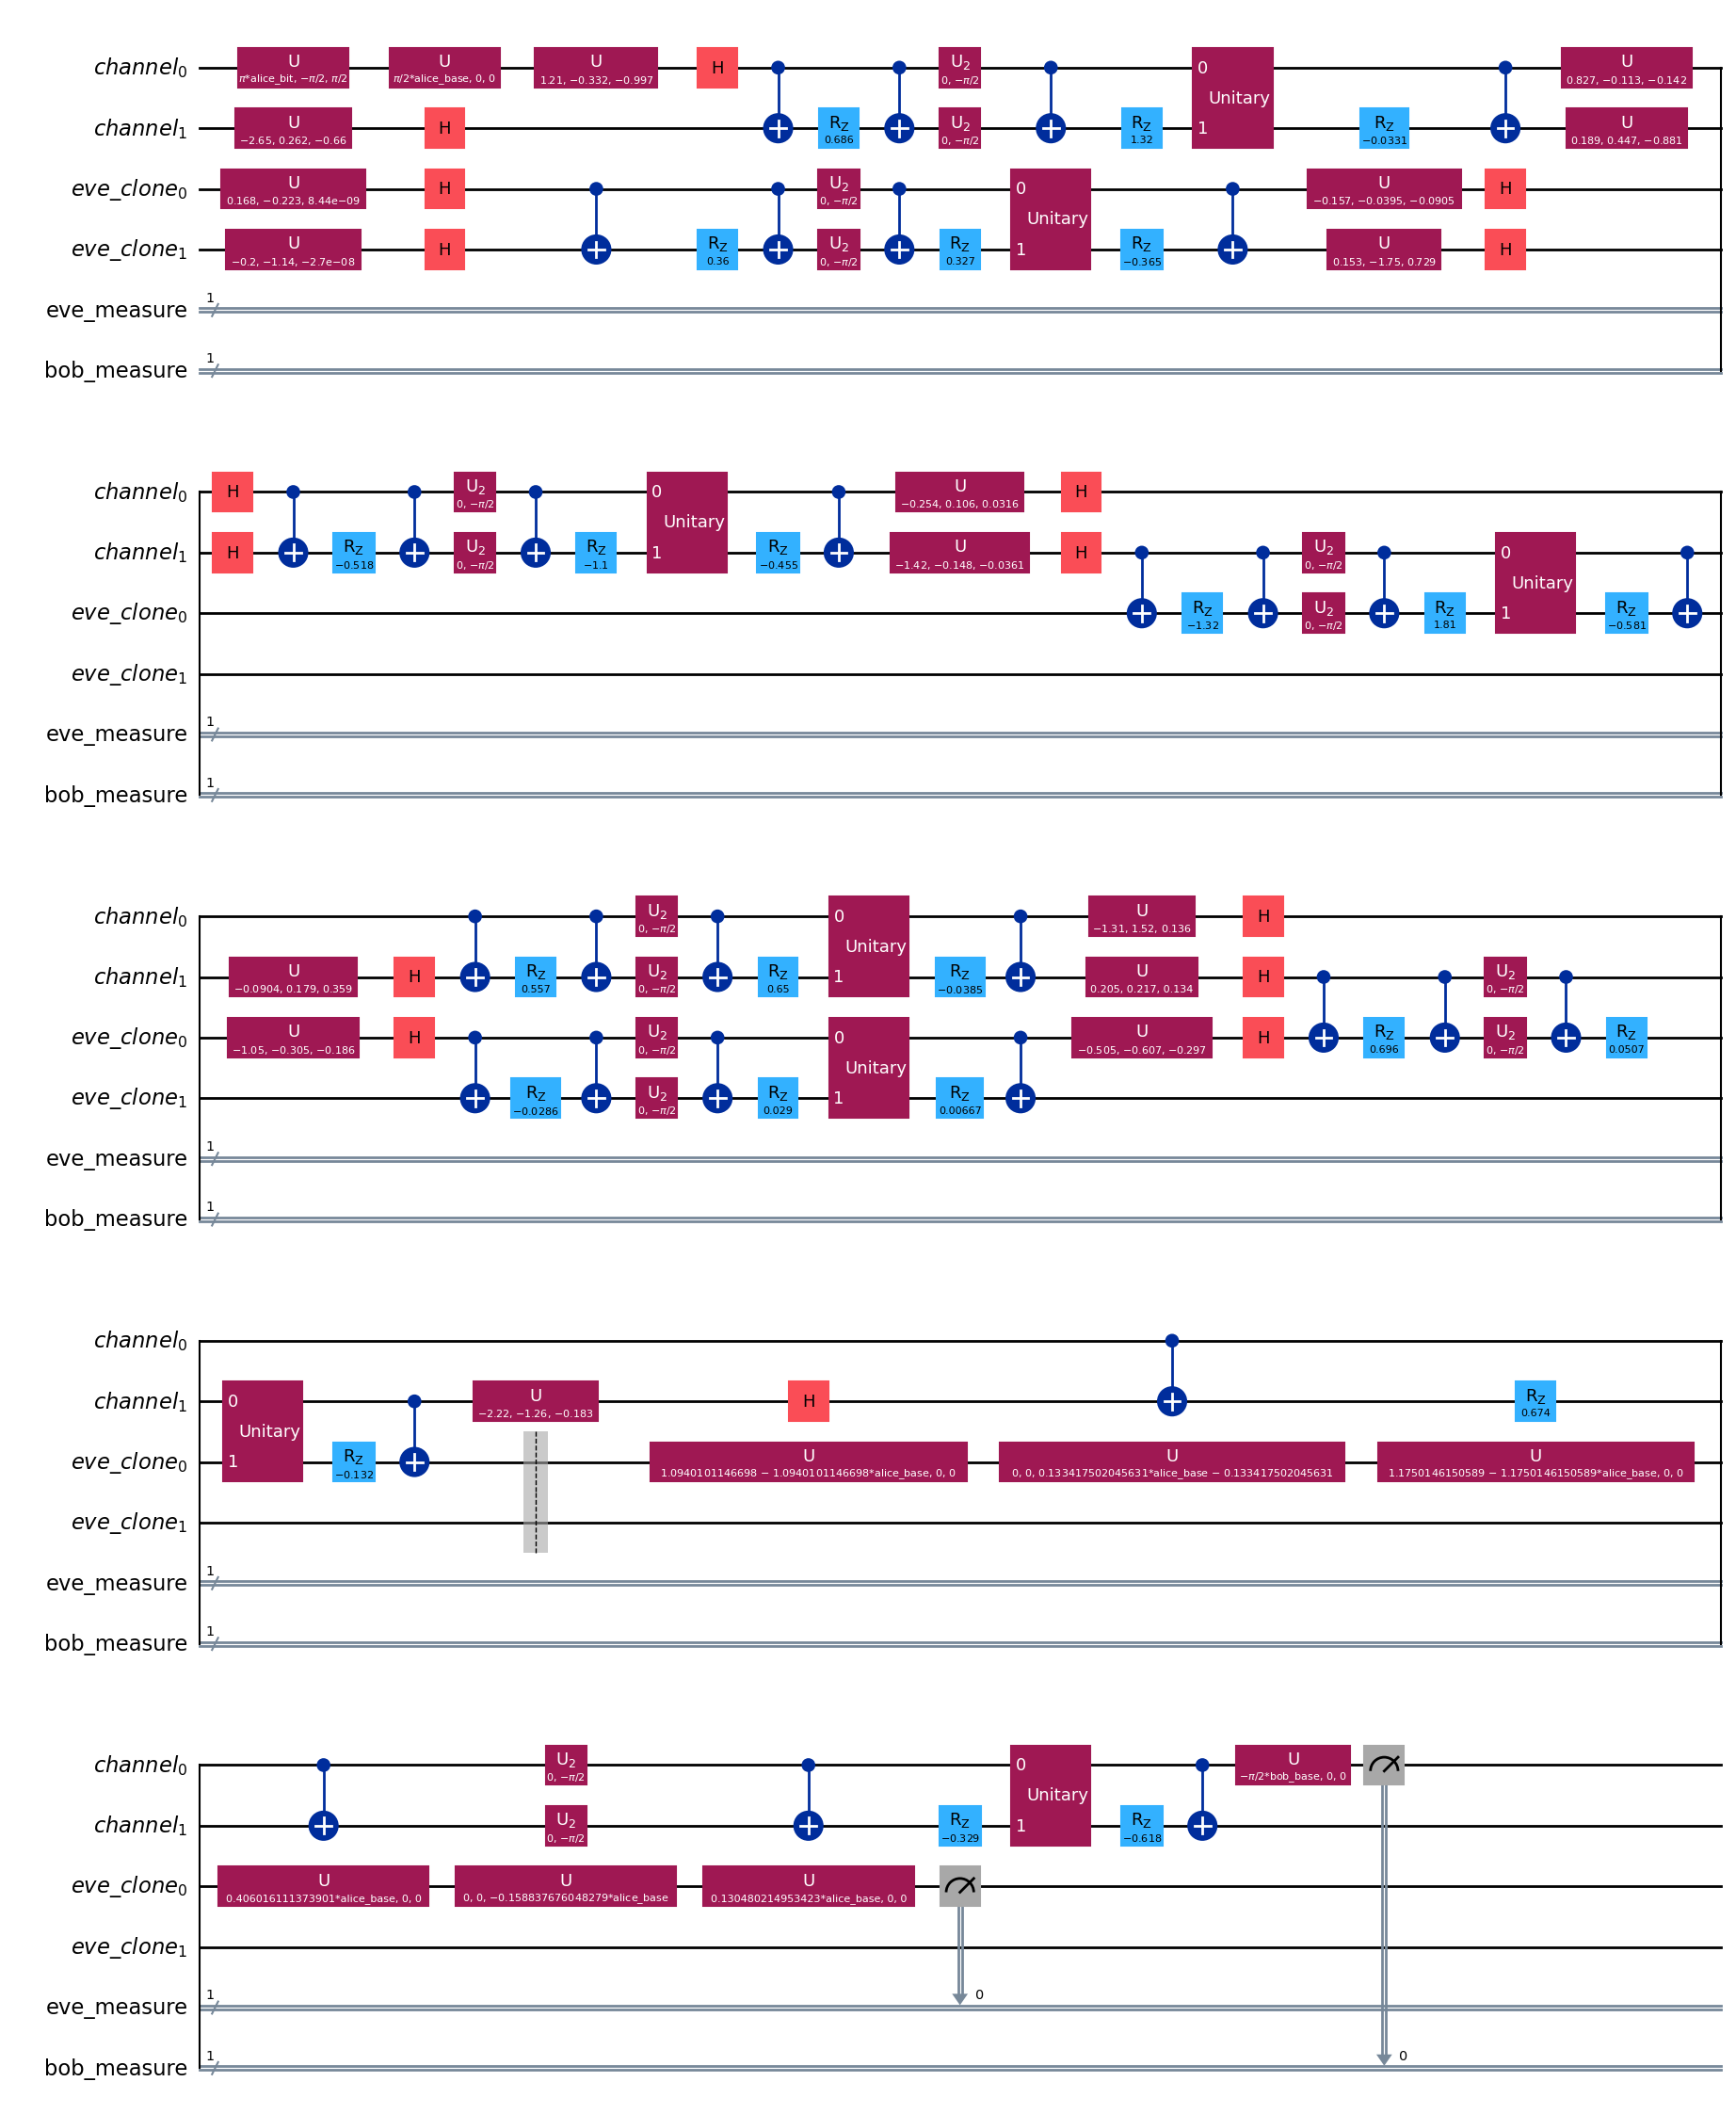

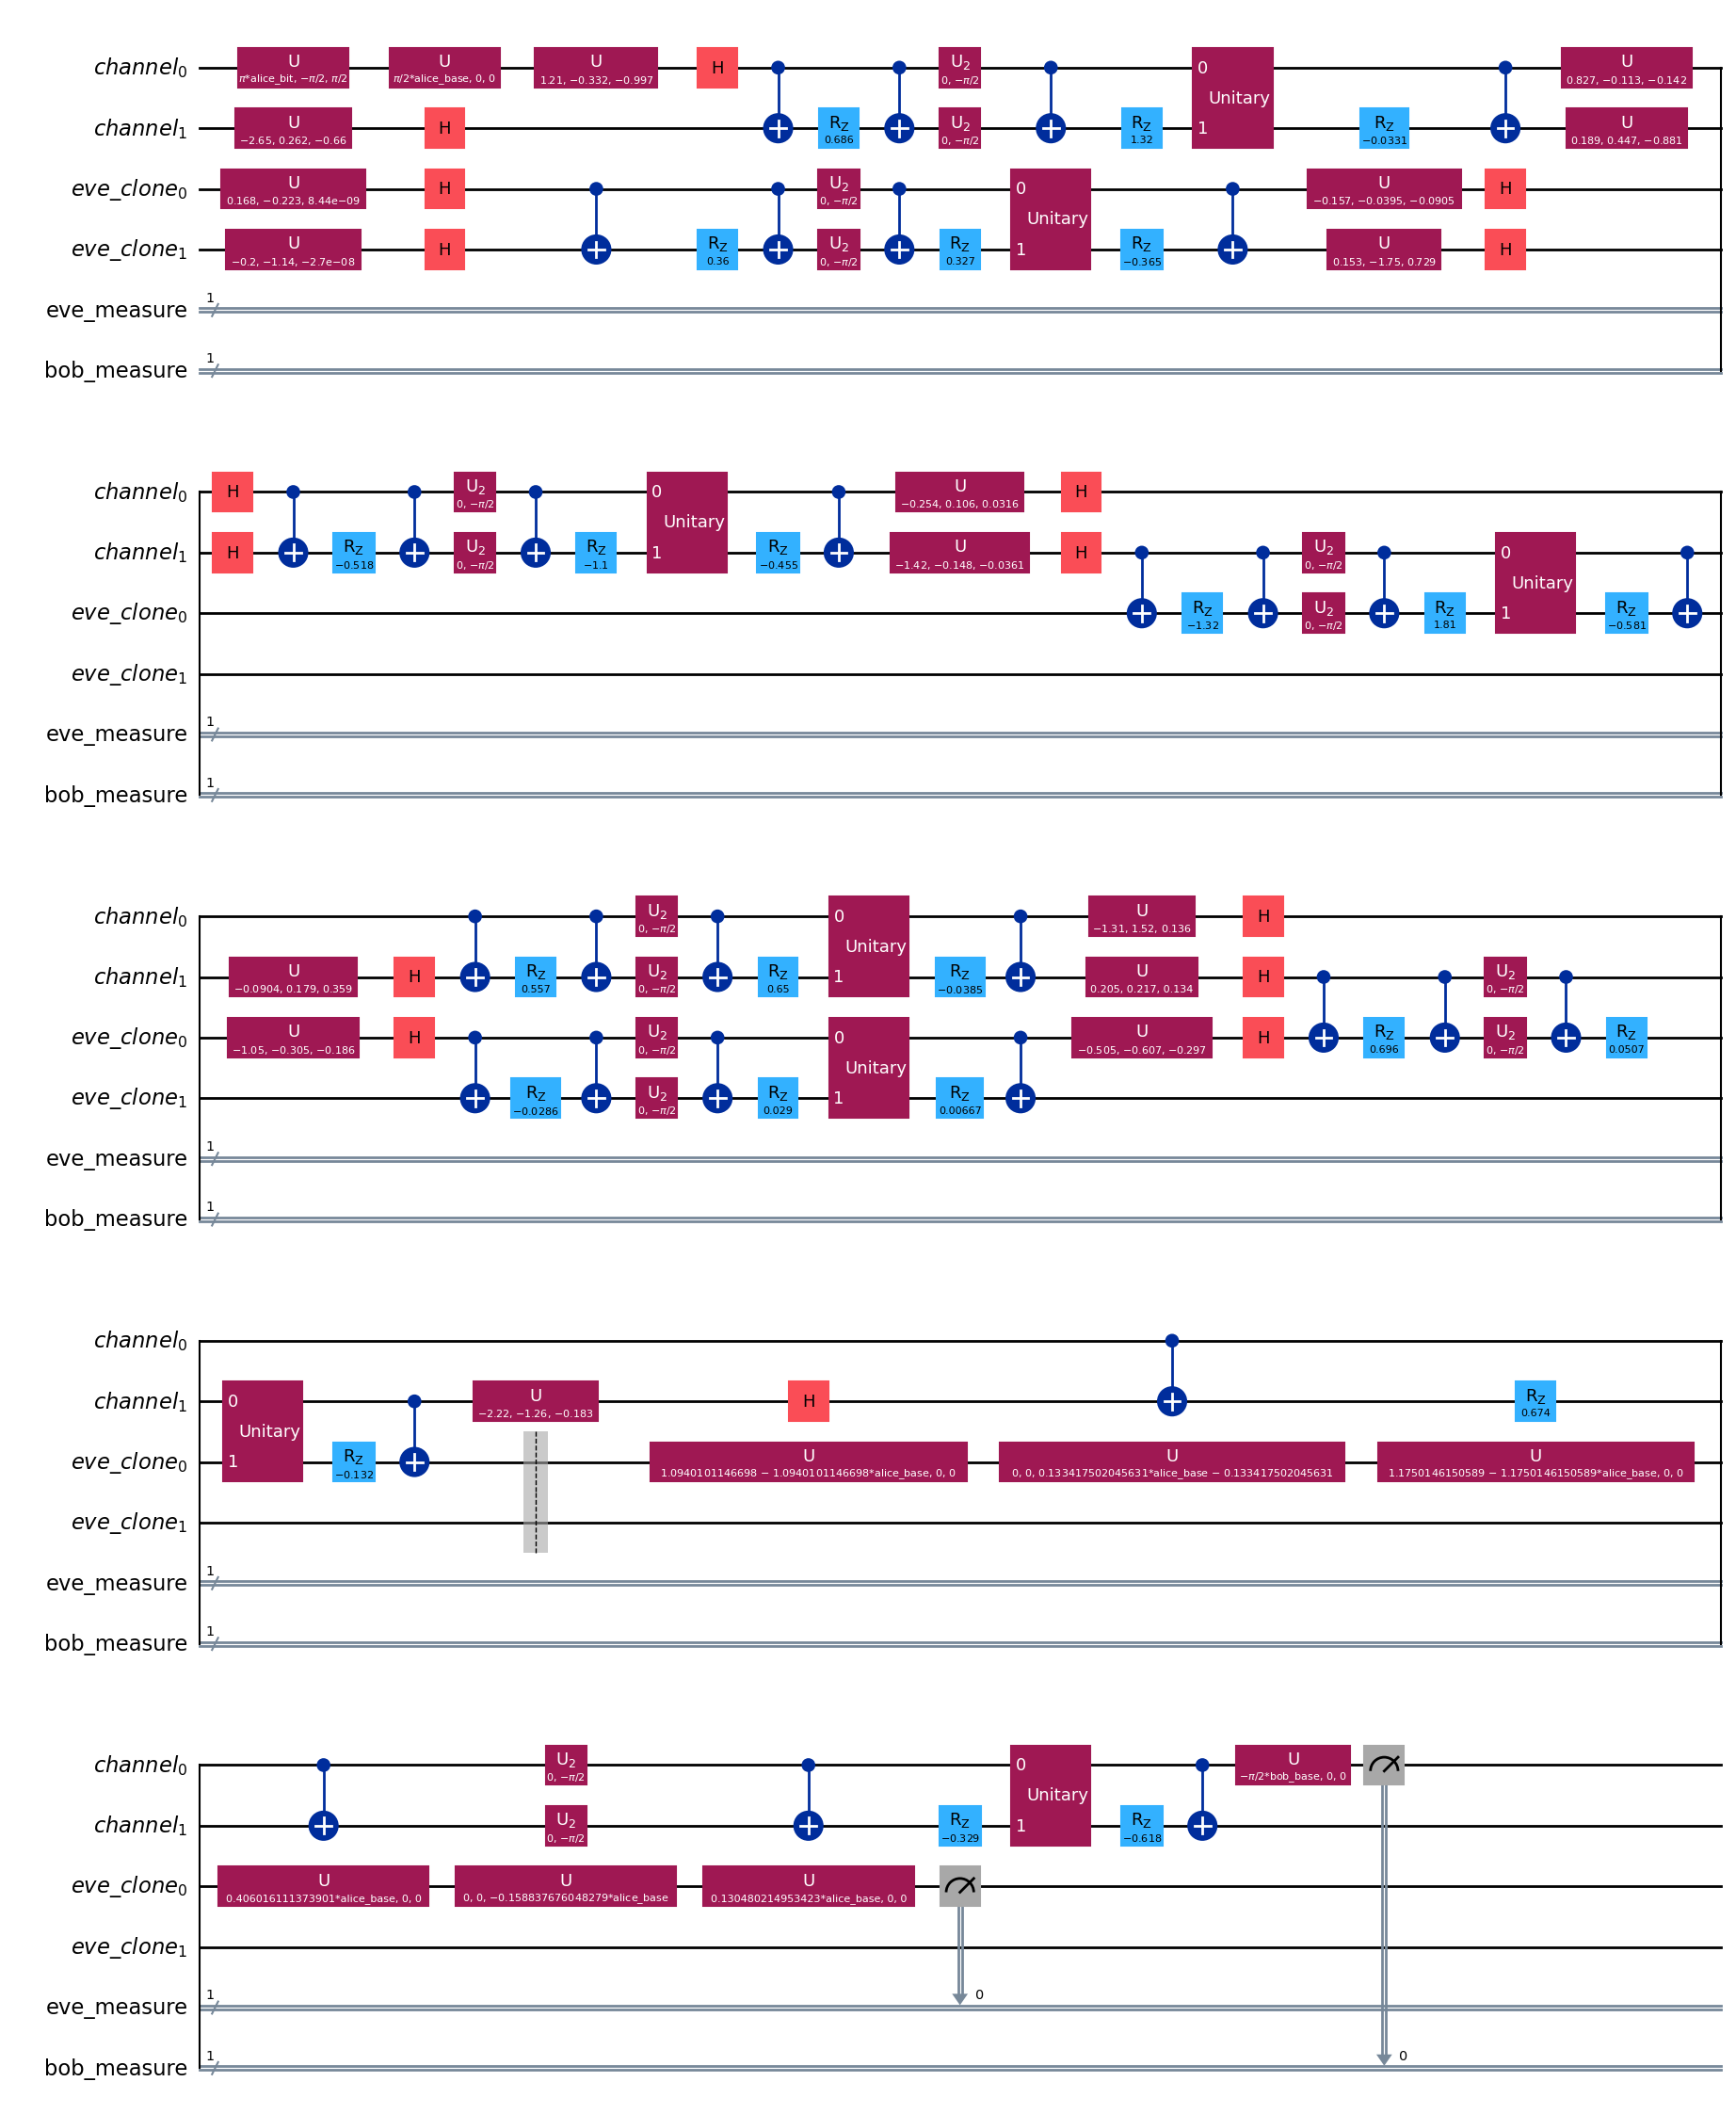

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")